In [3]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 16.2 MB/s eta 0:00:00


In [10]:
#import packages
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
import glob
import shutil
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import datasets 

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
ls -l

total 1594
-rw------- 1 root root 1576729 Mar 16 21:00  best_model.pt
drwx------ 2 root root    4096 Mar 16 17:48 'Collab Notebooks'/
drwx------ 2 root root    4096 Mar 16 17:45 'Dataset3_not using'/
drwx------ 2 root root    4096 Mar 16 17:47 'New Plant Diseases Dataset(Augmented)_ 23 classes'/
drwx------ 2 root root    4096 Mar 16 17:46 'Plant disease recognition dataset _ 3 classes'/
drwx------ 2 root root    4096 Mar 16 17:47 'PlantVillage_15 classes'/
drwx------ 2 root root    4096 Apr  5 00:22  ShuffleNet2/
-rw------- 1 root root   21774 Apr  8 06:38  trainer
drwx------ 2 root root    4096 Apr  7 21:29  Tunning/
drwx------ 2 root root    4096 Apr  4 17:57  wandb/


In [23]:
leaf_datasets = ImageFolder(
    '/content/drive/MyDrive/AI Project/Dataset1/PlantVillage_15 classes/',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
)

In [27]:
mkdir PVdatasetsplit

In [28]:

#Splitting the data

# Defining the path to dataset
dataset_path = '/content/drive/MyDrive/AI Project/Dataset1/PlantVillage_15 classes/'

train_ratio = 0.75
valid_ratio = 0.10
test_ratio = 0.15

# The path to the output directory
output_path = '/content/drive/MyDrive/AI Project/Dataset1/working/PVdatasetsplit/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Defining the names of the subdirectories for each set
train_dir = 'train'
valid_dir = 'valid'
test_dir = 'test'

# Creating the subdirectories for each set
os.makedirs(os.path.join(output_path, train_dir))
os.makedirs(os.path.join(output_path, valid_dir))
os.makedirs(os.path.join(output_path, test_dir))

# Loop over each class in the dataset
classes = os.listdir(dataset_path)
for cls in classes:
    # Create the subdirectories for each class in each set
    os.makedirs(os.path.join(output_path, train_dir, cls))
    os.makedirs(os.path.join(output_path, valid_dir, cls))
    os.makedirs(os.path.join(output_path, test_dir, cls))

    # Get the list of images for this class
    images = os.listdir(os.path.join(dataset_path, cls))
    num_images = len(images)

    # Shuffle the images
    random.shuffle(images)

    # Split the images into sets
    num_train = int(train_ratio * num_images)
    num_valid = int(valid_ratio * num_images)
    num_test = int(test_ratio * num_images)

    train_images = images[:num_train]
    valid_images = images[num_train:num_train+num_valid]
    test_images = images[num_train+num_valid:]

    # Copy the images to the corresponding subdirectories for each set
    for img in train_images:
        src_path = os.path.join(dataset_path, cls, img)
        print(img)
        dst_path = os.path.join(output_path, train_dir, cls, img)
        shutil.copyfile(src_path, dst_path)

    for img in valid_images:
        src_path = os.path.join(dataset_path, cls, img)
        dst_path = os.path.join(output_path, valid_dir, cls, img)
        shutil.copyfile(src_path, dst_path)

    for img in test_images:
        src_path = os.path.join(dataset_path, cls, img)
        dst_path = os.path.join(output_path, test_dir, cls, img)
        shutil.copyfile(src_path, dst_path)

Streaming output truncated to the last 5000 lines.
afd78d63-13b3-400f-8e9a-1c87f27fa12f___UF.GRC_BS_Lab Leaf 0239.JPG
b72055e8-e855-4c88-a6b1-88955a1b8be3___GCREC_Bact.Sp 5992.JPG
2f9cc9b4-9244-4043-b786-25be4b3e4063___UF.GRC_BS_Lab Leaf 9032.JPG
b760ae3c-bca5-48e1-bce3-a03e515dea88___GCREC_Bact.Sp 3322.JPG
72fa443f-fd37-4003-940b-cd96699b13dd___UF.GRC_BS_Lab Leaf 9082.JPG
7d7eab4f-21d6-4601-9c1e-1ff07404774e___UF.GRC_BS_Lab Leaf 0268.JPG
9fcfc450-dfc6-4749-bdf7-0cea7801dd84___GCREC_Bact.Sp 5821.JPG
1695eefb-cffc-4dac-b7ae-40f34ad9c5db___GCREC_Bact.Sp 3065.JPG
c977dd39-0fe7-4370-a7db-58c62b386f22___GCREC_Bact.Sp 6089.JPG
0f952ca0-e30b-4075-8bb9-1ebccb8aeb9f___GCREC_Bact.Sp 3326.JPG
eea69188-8c51-4d11-9e2d-4aec3e91a078___UF.GRC_BS_Lab Leaf 8912.JPG
70cbe0b7-6861-45fa-ad12-8766e5316b20___GCREC_Bact.Sp 3175.JPG
228ee04a-62e3-4fad-a457-62eb8b1472ee___UF.GRC_BS_Lab Leaf 0436.JPG
5c04a777-eb5c-4864-9c18-bc39d0c4dd2a___GCREC_Bact.Sp 5969.JPG
2ca9ca04-4520-46bd-8a08-f6f9f95e7369___GCREC_Bact.S

In [49]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip the images horizontally
    transforms.RandomRotation(10),  # Randomly rotate the images by up to 10 degrees
    transforms.ToTensor(),  # Convert the images to PyTorch tensors
    transforms.Normalize(  # Normalize the images
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

batch_size = 64
# Load the dataset
train_dataset = ImageFolder('/content/drive/MyDrive/AI Project/Dataset1/working/PVdatasetsplit/train', transform=transform)
test_dataset = ImageFolder('/content/drive/MyDrive/AI Project/Dataset1/working/PVdatasetsplit/test', transform=transform)
val_dataset = ImageFolder('/content/drive/MyDrive/AI Project/Dataset1/working/PVdatasetsplit/valid', transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size, shuffle=False)

In [50]:
print(len(train_loader))
print(len(test_loader))
print(len(val_loader))

242
49
33


In [51]:

# Define the model architecture
model = models.shufflenet_v2_x2_0(weights=None)
model.classifier = nn.Sequential(
    nn.Linear(1280, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 15)
)




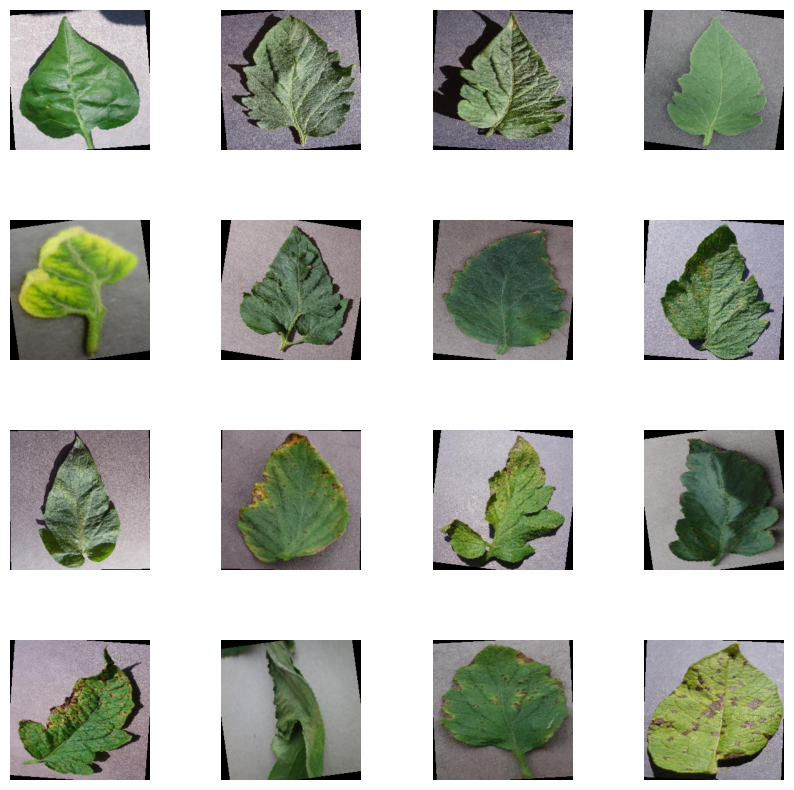

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Get a batch of images from the train loader
images, labels = next(iter(train_loader))

# Convert the PyTorch tensor to a NumPy array
images = images.numpy()

# Convert the NumPy array to a PyTorch tensor
images = torch.from_numpy(images)

# Denormalize the images
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])
images = images.permute(0, 2, 3, 1)  # Change the order of the dimensions
images = std * images + mean

# Create a figure with 4x4 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5) # Adjust subplot parameters
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(images[i])
    ax.axis('off')
plt.show()




In [53]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device {device}.")

# Move model to the device
model = model.to(device)

# Define the number of epochs to train for
num_epochs = 10

# Create lists to store train and validation loss and accuracy
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

# Train the model
for epoch in range(1, num_epochs+1):
    # Set the model to training mode
    model.train()
    train_loss = 0
    total_train_images = 0
    total_train_correct = 0

    # Loop over the training dataset in batches
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch}/{num_epochs}'):
        # Move data to the device
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculate training loss and accuracy
        train_loss += loss.item() * labels.size(0)
        _, predicted = torch.max(outputs, 1)
        total_train_correct += (predicted == labels).sum().item()
        total_train_images += labels.size(0)

    # Calculate training accuracy
    train_acc = total_train_correct / total_train_images

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        total_val_loss = 0
        total_val_correct = 0
        total_val_images = 0
        for images, labels in val_loader:
            # Move data to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item() * labels.size(0)
            _, predicted = torch.max(outputs, 1)
            total_val_correct += (predicted == labels).sum().item()
            total_val_images += labels.size(0)
        val_acc = total_val_correct / total_val_images
        print('Epoch [{}/{}], Training Loss: {:.4f}, Training Accuracy: {:.2f}%, Validation Loss: {:.4f}, Validation Accuracy: {:.2f}%'
              .format(epoch, num_epochs, train_loss/len(train_loader.dataset), train_acc*100, total_val_loss/len(val_loader.dataset), val_acc*100))

    # Append training and validation metrics to the corresponding lists
    train_loss_list.append(train_loss/len(train_loader.dataset))
    train_acc_list.append(train_acc*100)
    val_loss_list.append(total_val_loss/len(val_loader.dataset))
    val_acc_list.append(val_acc*100)

Training on device cuda.


Epoch 1/10: 100%|██████████| 242/242 [01:55<00:00,  2.09it/s]


Epoch [1/10], Training Loss: 1.0988, Training Accuracy: 64.81%, Validation Loss: 0.6507, Validation Accuracy: 77.89%


Epoch 2/10: 100%|██████████| 242/242 [01:55<00:00,  2.09it/s]


Epoch [2/10], Training Loss: 0.4871, Training Accuracy: 83.76%, Validation Loss: 0.5106, Validation Accuracy: 83.39%


Epoch 3/10: 100%|██████████| 242/242 [01:56<00:00,  2.08it/s]


Epoch [3/10], Training Loss: 0.3202, Training Accuracy: 89.22%, Validation Loss: 0.2914, Validation Accuracy: 90.36%


Epoch 4/10: 100%|██████████| 242/242 [01:56<00:00,  2.08it/s]


Epoch [4/10], Training Loss: 0.2459, Training Accuracy: 91.75%, Validation Loss: 0.2885, Validation Accuracy: 90.55%


Epoch 5/10: 100%|██████████| 242/242 [01:56<00:00,  2.08it/s]


Epoch [5/10], Training Loss: 0.1989, Training Accuracy: 93.44%, Validation Loss: 0.2911, Validation Accuracy: 89.87%


Epoch 6/10: 100%|██████████| 242/242 [01:56<00:00,  2.08it/s]


Epoch [6/10], Training Loss: 0.1647, Training Accuracy: 94.28%, Validation Loss: 0.2194, Validation Accuracy: 92.35%


Epoch 7/10: 100%|██████████| 242/242 [01:56<00:00,  2.08it/s]


Epoch [7/10], Training Loss: 0.1479, Training Accuracy: 95.09%, Validation Loss: 0.1767, Validation Accuracy: 93.62%


Epoch 8/10: 100%|██████████| 242/242 [01:56<00:00,  2.08it/s]


Epoch [8/10], Training Loss: 0.1245, Training Accuracy: 95.73%, Validation Loss: 0.2343, Validation Accuracy: 92.64%


Epoch 9/10: 100%|██████████| 242/242 [01:56<00:00,  2.08it/s]


Epoch [9/10], Training Loss: 0.1072, Training Accuracy: 96.37%, Validation Loss: 0.1589, Validation Accuracy: 94.25%


Epoch 10/10: 100%|██████████| 242/242 [01:56<00:00,  2.08it/s]


Epoch [10/10], Training Loss: 0.1039, Training Accuracy: 96.51%, Validation Loss: 0.1023, Validation Accuracy: 96.74%


In [43]:
# Train the model
num_epochs=10
for epoch in range(16, num_epochs+1):
    # Set the model to training mode
    model.train()
    train_loss = 0
    total_train_images = 0
    total_train_correct = 0

    # Loop over the training dataset in batches
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch}/{num_epochs}'):
        # Move data to the device
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculate training loss and accuracy
        train_loss += loss.item() * labels.size(0)
        _, predicted = torch.max(outputs, 1)
        total_train_correct += (predicted == labels).sum().item()
        total_train_images += labels.size(0)

    # Calculate training accuracy
    train_acc = total_train_correct / total_train_images

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        total_val_loss = 0
        total_val_correct = 0
        total_val_images = 0
        for images, labels in val_loader:
            # Move data to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item() * labels.size(0)
            _, predicted = torch.max(outputs, 1)
            total_val_correct += (predicted == labels).sum().item()
            total_val_images += labels.size(0)
        val_acc = total_val_correct / total_val_images
        print('Epoch [{}/{}], Training Loss: {:.4f}, Training Accuracy: {:.2f}%, Validation Loss: {:.4f}, Validation Accuracy: {:.2f}%'
              .format(epoch, num_epochs, train_loss/len(train_loader.dataset), train_acc*100, total_val_loss/len(val_loader.dataset), val_acc*100))

    # Append training and validation metrics to the corresponding lists
    train_loss_list.append(train_loss/len(train_loader.dataset))
    train_acc_list.append(train_acc*100)
    val_loss_list.append(total_val_loss/len(val_loader.dataset))
    val_acc_list.append(val_acc*100)

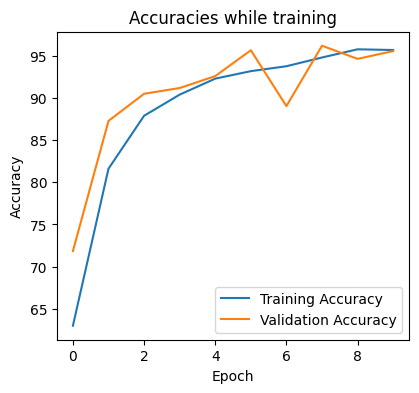

In [44]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(val_acc_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracies while training')
plt.show()

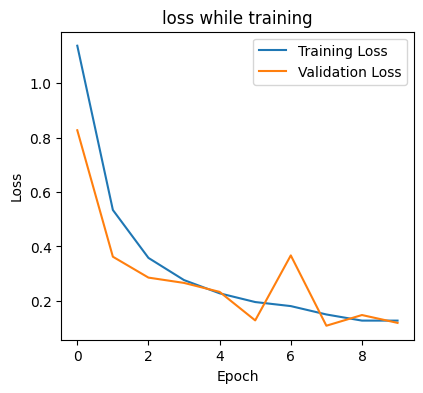

In [45]:
# Plot the training and validation loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('loss while training')
plt.show()

In [46]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    total_test_loss = 0
    total_correct = 0
    total_images = 0
    # Use tqdm to add a progress bar
    for images, labels in tqdm(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_test_loss += loss.item() * labels.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_images += labels.size(0)
    test_loss = total_test_loss / total_images
    accuracy = total_correct / total_images
    print('Test Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(test_loss, accuracy*100))

100%|██████████| 97/97 [00:18<00:00,  5.20it/s]

Test Loss: 0.2384, Test Accuracy: 92.55%


In [47]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Initialize lists to store true labels and predicted labels
true_labels = []
pred_labels = []

# Loop over the validation dataset in batches
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    # Predict the labels
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Append the true and predicted labels to the corresponding lists
    true_labels.extend(labels.tolist())
    pred_labels.extend(predicted.tolist())

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Compute precision, recall, and F-score
precision = precision_score(true_labels, pred_labels, average='macro')
recall = recall_score(true_labels, pred_labels, average='macro')
f_score = f1_score(true_labels, pred_labels, average='macro')

print('Precision: {:.4f}, Recall: {:.4f}, F-score: {:.4f}'.format(precision, recall, f_score))

Precision: 0.9171, Recall: 0.9103, F-score: 0.9094


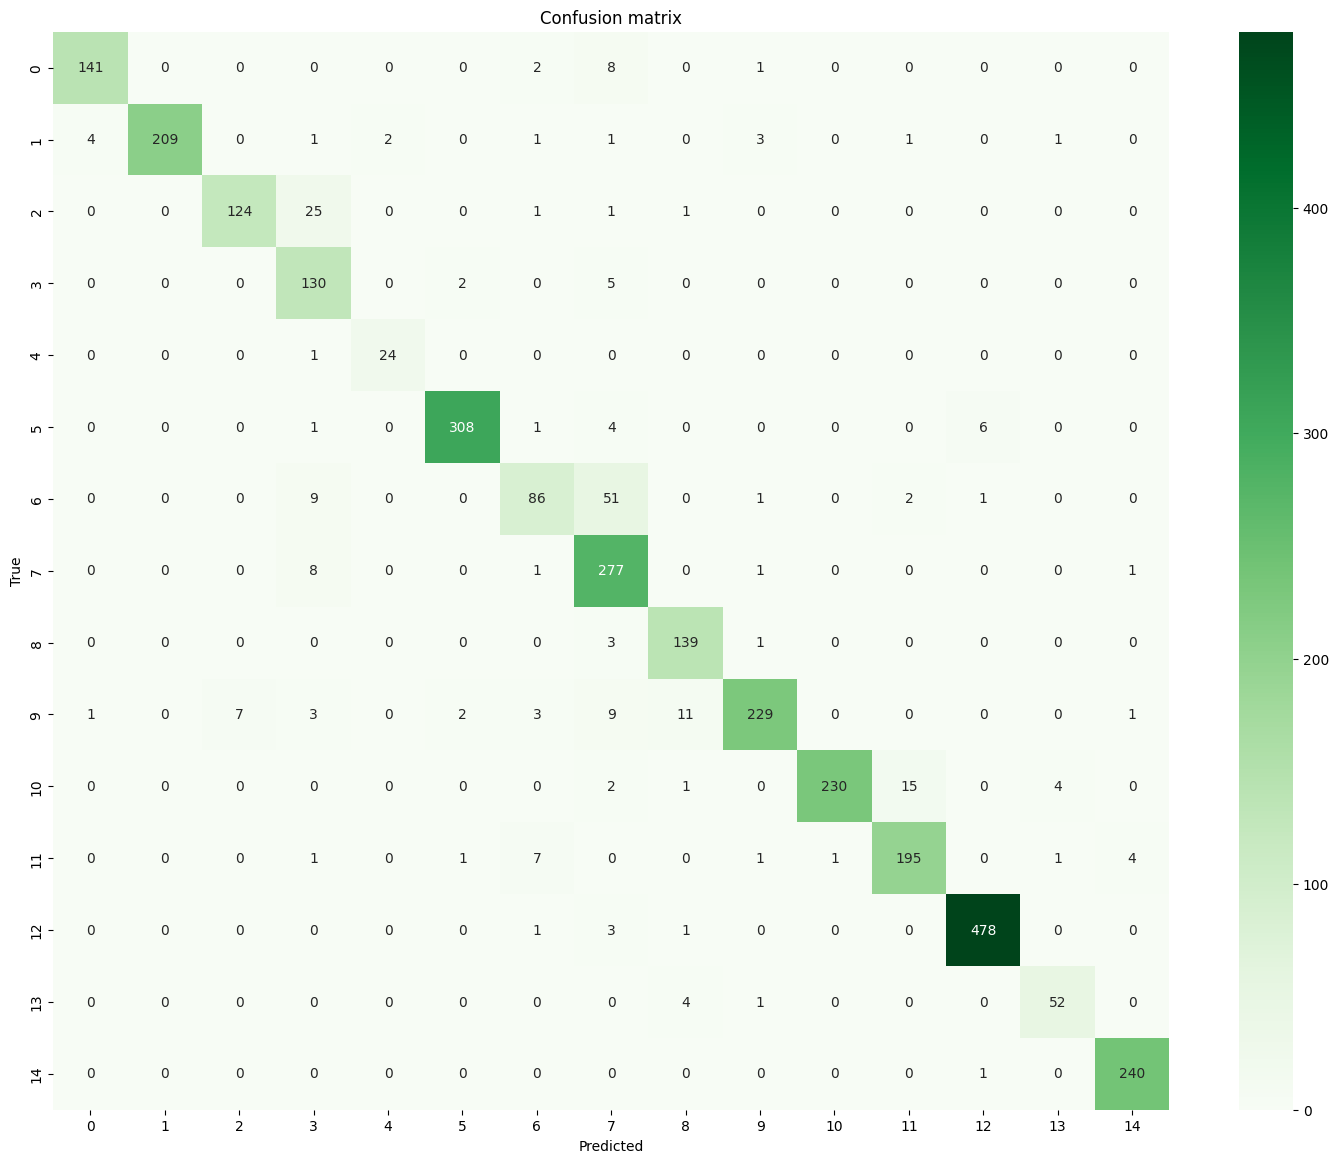

In [48]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 14))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, 'dataset2')

In [ ]:
torch.save(model.state_dict(), 'best_model.pt')
print("model saved")